In [16]:
import datetime
import pytz    #This library allows accurate and cross platform timezone calculations
from sklearn.cluster import KMeans 
from matplotlib import pyplot as plt
import matplotlib.ticker as mpticker
import pandas
import numpy

In [17]:
# The mplfinance package provides utilities for the visualization, and visual analysis, of financial data
from mpl_finance import candlestick_ohlc
# Taking data from Yahoo Finance
import yfinance as yf
yf.pdr_override()

In [18]:
def get_optimum_clusters(df, saturation_point=0.05):
    '''
    :param df: dataframe
    :param saturation_point (5%): The amount of difference we are willing to detect
    :return: clusters with optimum K centers
    This method uses elbow method to find the optimum number of K clusters
    We initialize different K-means with 1..10 centers and compare the inertias
    If the difference is no more than saturation_point, we choose that as K and move on
    '''

    wcss = []
    k_models = []

    size = min(11, len(df.index))
    for i in range(1, size):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
        k_models.append(kmeans)

    # Compare differences in inertias until it's no more than saturation_point
    optimum_k = len(wcss)-1
    for i in range(0, len(wcss)-1):
        diff = abs(wcss[i+1] - wcss[i])
        if diff < saturation_point:
            optimum_k = i
            break

    print("Optimum K is " + str(optimum_k + 1))
    optimum_clusters = k_models[optimum_k]

    return optimum_clusters

In [19]:
def plot_price_data(data):   #creating 2 subplots, one for price and one for volume
    fig, ax = plt.subplots()
    ax1 = plt.subplot2grid((5,1), (0,0), rowspan=4)
    ax2 = plt.subplot2grid((5,1), (4,0), sharex=ax1)

    ax1.set_title("{} - {}".format(symbol, start))
    ax1.set_facecolor("#131722")
    ax1.xaxis.set_major_formatter(mpticker.FuncFormatter(mydate))

    candlestick_ohlc(ax1, data.to_numpy(), width=8, colorup='#77d879', colordown='#db3f3f')

    ax2.bar(data['Time'], data['Volume'], width=30)
    ax2.xaxis.set_major_formatter(mpticker.FuncFormatter(mydate))
    fig.subplots_adjust(hspace=0)
    fig.autofmt_xdate()
    return ax1


In [20]:
def mydate(x,pos):     #adjusting timezone
    try:
        return datetime.datetime.fromtimestamp(x, tz=est).strftime(date_format)
    except IndexError:
        return ''

In [21]:
symbol = "AMZN"
start = "2023-06-01"
end = "2023-06-02"
est = pytz.timezone('US/Eastern')
date_format = "%H:%M"
ticker = yf.Ticker(symbol)
intraday_data = ticker.history(period="1d", interval="1m",start=start, end=end, prepost=False, actions=False)
intraday_data = intraday_data[:15] 


In [22]:
intraday_data["Time"] = [d.timestamp() for d in intraday_data.index]    #Converting Datetime format to timestamp
intraday_data = intraday_data[[ "Time", "Open", "High", "Low", "Close", "Volume"]]

In [23]:
intraday_data

,Time,Open,High,Low,Close,Volume
Datetime,,,,,,
2023-06-01 09:30:00-04:00,1.685626e+09,120.690002,121.570000,120.610001,121.550003,1773493
2023-06-01 09:31:00-04:00,1.685626e+09,121.558701,121.559998,120.904198,121.050003,286869
2023-06-01 09:32:00-04:00,1.685626e+09,121.052399,121.220001,120.849998,121.070000,253911
2023-06-01 09:33:00-04:00,1.685626e+09,121.059998,121.099998,120.663597,120.856003,237820
2023-06-01 09:34:00-04:00,1.685626e+09,120.860001,120.860001,120.160004,120.330002,346930
2023-06-01 09:35:00-04:00,1.685626e+09,120.320000,120.410004,119.930000,120.190002,292237
2023-06-01 09:36:00-04:00,1.685627e+09,120.183998,120.339996,120.139999,120.239998,179203
2023-06-01 09:37:00-04:00,1.685627e+09,120.235001,120.370003,120.180000,120.279999,153431
2023-06-01 09:38:00-04:00,1.685627e+09,120.279999,120.620003,120.275002,120.529999,266805


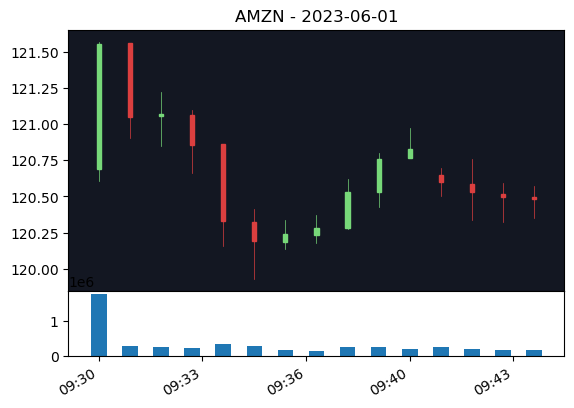

In [24]:
ax = plot_price_data(intraday_data)

In [25]:
lows = pandas.DataFrame(data=intraday_data, index=intraday_data.index, columns=["Low"])
highs = pandas.DataFrame(data=intraday_data, index=intraday_data.index, columns=["High"])

In [26]:
low_clusters = get_optimum_clusters(lows)
low_centers = low_clusters.cluster_centers_
low_centers = numpy.sort(low_centers, axis=0)

high_clusters = get_optimum_clusters(highs)
high_centers = high_clusters.cluster_centers_
high_centers = numpy.sort(high_centers, axis=0)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Optimum K is 4


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Optimum K is 5


In [27]:
print(low_centers)
print(high_centers)

[[120.10250092]
 [120.3430191 ]
 [120.59140015]
 [120.83973185]]
[[120.37333425]
 [120.62072372]
 [120.84750175]
 [121.15999985]
 [121.56499863]]


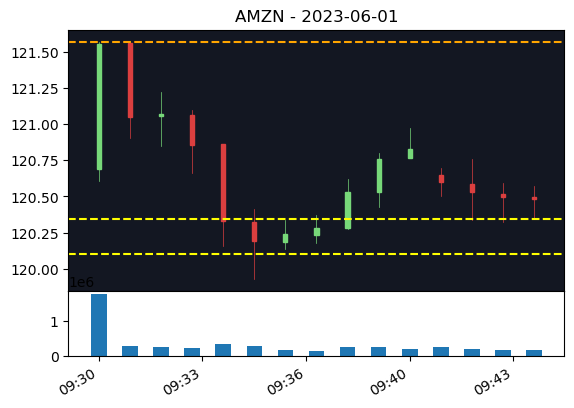

In [31]:
ax = plot_price_data(intraday_data)
for low in low_centers[:2]:
    ax.axhline(low[0], color='yellow', ls='--')

for high in high_centers[-1:]:
    ax.axhline(high[0], color='orange', ls='--')
plt.show()